In [6]:
import klimadata
import plot
from pyextremes import EVA
import pyextremes

In [7]:
parameterliste = ['rr', 'tm', 'sd', 'fsw', 'sdfsw', 'sdfsw3d']
lon = '6821432.82'
lat= '70342.98'
startdato = '1958-01-01'
sluttdato = '2021-12-31'
plottype = 'Klimaoversikt med 3 døgn snø og returverdi'
annotert = True
vind = True
lon = int(float(lon.strip()))
lat = int(float(lat.strip()))

In [8]:
klimaretur = klimadata.nve_api(lat, lon, startdato, sluttdato, 'rr')

In [20]:
df, altitude = klimadata.klima_dataframe(lat, lon, startdato, sluttdato, parameterliste)
df

,rr,tm,sd,fsw,sdfsw,sdfsw3d,rr3
1958-01-01,0.0,-9.25,33.3,0,0.0,4.6,0.0
1958-01-02,0.0,-13.05,33.0,0,0.0,4.6,0.0
1958-01-03,0.1,-15.05,33.0,0,0.1,0.1,0.1
1958-01-04,11.4,-10.55,49.0,13,18.6,18.7,11.5
1958-01-05,4.6,-4.65,50.1,5,4.7,23.4,16.1
...,...,...,...,...,...,...,...
2021-12-27,0.0,-6.85,19.8,0,0.0,0.0,4.7
2021-12-28,0.0,-8.15,19.3,0,0.0,0.0,3.8
2021-12-29,0.0,-5.25,18.8,0,0.0,0.0,0.0
2021-12-30,20.8,-3.95,33.3,21,18.5,6.7,20.8


In [21]:
df['sd'].min()

0.0

In [22]:
max_df = klimadata.maxdf(df)

In [23]:
max_df

,sdfsw3d,rr,rr3,sd
1958-12-31,43.5,36.3,49.2,106.1
1959-12-31,39.8,49.7,64.6,91.8
1960-12-31,20.2,35.5,57.4,54.6
1961-12-31,42.7,40.3,75.0,84.3
1962-12-31,42.7,35.3,57.0,166.8
...,...,...,...,...
2017-12-31,47.8,42.1,75.7,121.9
2018-12-31,47.4,51.3,73.3,170.4
2019-12-31,25.5,55.9,91.7,56.4
2020-12-31,26.5,73.5,130.2,134.2


In [24]:
model = EVA(df['sdfsw3d'])

2022-11-01 19:45:42.951 INFO    pyextremes.eva: successfully initialized EVA object


In [25]:
model.get_extremes(method="BM", block_size="365.2425D")

2022-11-01 19:45:43.150 INFO    pyextremes.eva: successfully extracted extreme values for method='BM' and extremes_type='high'
2022-11-01 19:45:43.150 INFO    pyextremes.eva: successfully collected extreme value properties
2022-11-01 19:45:43.150 INFO    pyextremes.eva: successfully created extremes transformer
2022-11-01 19:45:43.150 INFO    pyextremes.eva: removing any previously declared models


In [26]:
print(model.extremes.head())

date-time
1958-12-31    43.5
1959-02-22    39.8
1960-03-02    20.2
1961-02-08    42.7
1962-01-08    42.7
Name: sdfsw3d, dtype: float64


(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot: xlabel='date-time', ylabel='sdfsw3d'>)

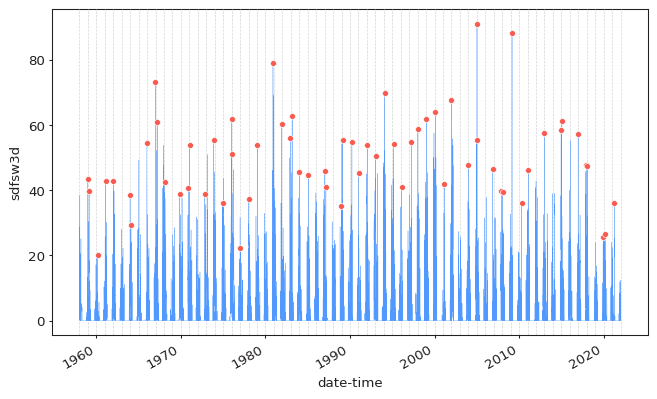

In [27]:
model.plot_extremes()

In [28]:
print(model.fit_model.__doc__)


        Fit a model to the extracted extreme values.

        Parameters
        ----------
        model : str, optional
            Name of model. By default it is 'MLE'.
            Name of model.
            Supported models:
                MLE - Maximum Likelihood Estimate (MLE) model.
                    Based on 'scipy' package (scipy.stats.rv_continuous.fit).
                Emcee - Markov Chain Monte Carlo (MCMC) model.
                    Based on 'emcee' package by Daniel Foreman-Mackey.
        distribution : str or scipy.stats.rv_continuous, optional
            Distribution name compatible with scipy.stats
            or a subclass of scipy.stats.rv_continuous.
            See https://docs.scipy.org/doc/scipy/reference/stats.html
            By default the distribution is selected automatically
            as best between 'genextreme' and 'gumbel_r' for 'BM' extremes
            and 'genpareto' and 'expon' for 'POT' extremes.
            Best distribution is selected us

In [29]:
model.fit_model(model="MLE", distribution="gumbel_r")

In [30]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)

C:\Users\Eigar\koding\av-kllima-2\klima10\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [31]:
print(summary)

               return value    lower ci    upper ci
return period                                      
1.0                    -inf         NaN         NaN
2.0               47.731678   44.576059   51.024272
5.0               62.041067   57.425448   66.566240
10.0              71.515127   65.308187   77.149637
25.0              83.485627   74.946584   90.690282
50.0              92.366028   82.040128  100.937465
100.0            101.180857   89.121921  111.157489
250.0            112.787021   98.135676  124.952407
500.0            121.550582  105.141011  134.992607
1000.0           130.307807  112.021211  145.260127


In [32]:
print(model.extremes)

date-time
1958-12-31    43.5
1959-02-22    39.8
1960-03-02    20.2
1961-02-08    42.7
1962-01-08    42.7
              ... 
2017-12-09    47.8
2018-01-25    47.4
2019-12-11    25.5
2020-03-18    26.5
2021-04-07    36.0
Name: sdfsw3d, Length: 64, dtype: float64


In [33]:
model.plot_diagnostic(alpha=0.95)

(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='sdfsw3d'>,
  <AxesSubplot: title={'center': 'Probability density plot'}, xlabel='sdfsw3d', ylabel='Probability density'>,
  <AxesSubplot: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

In [34]:
model.plot_return_values(alpha=0.95)

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot: xlabel='Return period', ylabel='sdfsw3d'>)

In [35]:
def ekstremverdi_3d_sd(df):
    data = df['sdfsw3d']
    model = EVA(data=data)
    model.get_extremes(
    method="BM",
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",
    )
    model.fit_model(model="MLE", distribution="gumbel_r")


    fig, ax1 = model.plot_return_values(
    return_period=np.logspace(0.01, 3.75, 5000),
    alpha=0.95,
    )

    summary = model.get_summary(
    return_period=[100, 1000, 5000],
    alpha=0.95,
    n_samples=1000,
    )

    ax1.set_xlabel('Returperiode (År)')
    ax1.set_ylabel('Maksimal årlig 3 døgns nysnøhøgde (cm)')
    ax1.text(100, 
            summary['return value'].min()*0.3, 
            '100 år returverdi: ' + str(round(summary['return value'].loc[100.0])) + ' cm \n'
            '1000 år returverdi: ' + str(round(summary['return value'].loc[1000.0])) + ' cm \n'
            '5000 år returverdi: ' + str(round(summary['return value'].loc[5000.0])) + ' cm \n' )

    return fig, ax1


In [36]:
plot.ekstremverdi_3d_sd(df)


2022-11-01 19:45:48.876 INFO    pyextremes.eva: successfully initialized EVA object
2022-11-01 19:45:48.906 INFO    pyextremes.eva: successfully extracted extreme values for method='BM' and extremes_type='high'
2022-11-01 19:45:48.907 INFO    pyextremes.eva: successfully collected extreme value properties
2022-11-01 19:45:48.907 INFO    pyextremes.eva: successfully created extremes transformer
2022-11-01 19:45:48.908 INFO    pyextremes.eva: removing any previously declared models


(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot: xlabel='Returperiode (År)', ylabel='Maksimal årlig 3 døgns nysnøhøgde (cm)'>)

In [37]:
def gammel_plot_ekstremverdier_3dsno(df, ax1=None):
    maximal = maxdf(df)
    liste =  maximal['sdfsw3d'].tolist()
    array = np.array(liste)
    model = e.Gumbel(array, fit_method = 'mle', ci = 0.05, ci_method = 'delta')
    
    if ax1 is None:
        ax1 = plt.gca()

    return model.plot_return_values('3ds')

In [38]:
gammel_plot_ekstremverdier_3dsno(df)

NameError: name 'maxdf' is not defined

In [ ]:
data = df['sdfsw3d']
model = EVA(data=data)
model.get_extremes(
method="BM",
extremes_type="high",
block_size="365.2425D",
errors="raise",
)
model.fit_model(model="MLE", distribution="gumbel_r")

# if ax1 is None:
#     ax1 = plt.gca()

fig, ax1 = model.plot_return_values(
return_period=np.logspace(0.01, 3.75, 5000),
alpha=0.95,
)

summary = model.get_summary(
return_period=[100, 1000, 5000],
alpha=0.95,
n_samples=1000,
)

ax1.set_xlabel('Returperiode (År)')
ax1.set_ylabel('Maksimal årlig 3 døgns nysnøhøgde (cm)')
ax1.text(100, 
        summary['return value'].min()*0.3, 
        '100 år returverdi: ' + str(round(summary['return value'].loc[100.0])) + ' cm \n'
        '1000 år returverdi: ' + str(round(summary['return value'].loc[1000.0])) + ' cm \n'
        '5000 år returverdi: ' + str(round(summary['return value'].loc[5000.0])) + ' cm \n' )
